# Board Game Geek Data Analysis: Example 2

## Introduction
For this data science project, I have created multiple python scripts that have scraped https://boardgamegeek.com

As part of the web scraping/data mining, I have created a Postgres database where all of my board game data has been stored. A total of 10,000 board games were scraped from the website, using the Python packages "requests" and "BeautifulSoup", as well as the [XML formatted API](https://boardgamegeek.com/wiki/page/BGG_XML_API&redirectedfrom=XML_API#) that is provided by boardgamegeek.com.

All of the data analysis is built around SQL queries to my boardgame database, for which I use the Python package "psycopg2" to communicate.

The full list of data scraped for each boardgame is:
* __id__:            Unique ID assigned to the boardgame by boardgamegeek.com
* __rank__:          Current rank of the boardgame at the time of scraping
* __name__:          Name of boardgame
* __href__:          Part of URL that identifies this boardgame. Append it to https://boardgamegeek.com to go to game's page
* __pub_year__:      Year the boardgame was published
* __geek_rating__:   Current geek rating the boardgame has at the time of scraping. This is what the game is ranked by. Rating is weighted by the number of voters
* __avg_rating__:    Current average rating the boardgame has at the time of scraping. This is based off the people who have rated it
* __num_voters__:    Number of people who have rated the boardgame at the time of scraping
* __min_players__:   Minimum number of players for the boardgame
* __max_players__:   Maximum number of players for the boardgame
* __play_time__:     Estimated time it takes to play the boardgame
* __sugg_age__:      Suggested minimum age to play the boardgame
* __complx_rating__: A rating based off votes by players for how difficult a boardgame is to learn and play 
* __designers__:     List of designers who made the boardgame
* __artists__:       List of artists for the boardgame
* __categories__:    List of categories the boardgame was placed in
* __mechanics__:     List of gaming mechanics used in the boardgame
* __family__:        List of families the boardgame is grouped into
* __type__:          List of types the boardgame is classified under

## Project Proposal

Boardgames are a very popular activity for people and boardgamegeek.com has a very active community. I believe it's possible to leverage the immense ammount of data on their website in order to investigate what makes a boardgame highly rated. There are many possibilites that could influence what makes a game well rated and it's likely that the data is very intertwined, where no one factor can really determine a game's success. This provides a difficult problem that machine learning/deep learning may be able to solve. At the very least there's plenty of data, including personal user data on the website that hasn't been tapped, which could help build a recommendation system that could recommend similar boardgames to a user, based on their interests.

Project Ideas:
* Use machine learning to learn what makes a highly rated game. Allow users to select game features and have the machine learning algorithm estimate a games rating.
* Build a recommendation system. Recommend similar games to a user, based on their interests. Can leverage just boardgame data, boardgamegeek user data (requires more scraping), or both.
* Build a chatbot that can talk with a user and help guide them through finding a game that they'd like to play/purchase. Use natural language processing and deep learning, combined with the data scraped from boardgamegeek.com. 

## Exploratory Data Analysis: Game Designers

An idea I wanted to investigate was if a boardgame's suggested player age trends with a boardgame's complexity rating, which users of the site vote on. More specifically, how does this distribution look for a specific element of a boardgame, such as its designer, artist, etc. The complexity rating is a measure of how complicated a game is to play and is on a scale from 1-5. For now I will focus on boardgame designers.

Let's first look at some of the top game designers and how many boardgames they've designed. The function __count_column__ sends a simple SQL query to my database:
```
SELECT designer, COUNT(bg_id) FROM designers GROUP BY designer ORDER BY COUNT(bg_id) DESC;
```

In [1]:
import data_analysis

des_count = data_analysis.count_column('designers')

for designer, num_games in des_count[:10]:
    print '%20s %5s' %(designer, num_games)

        (Uncredited)   303
       Reiner Knizia   191
     Wolfgang Kramer    88
     Richard H. Berg    83
      Joseph Miranda    79
          Dean Essig    75
      Frank Chadwick    70
      Martin Wallace    66
       Bruno Cathala    60
        Klaus Teuber    55


We can see that 303 games did not have designers assigned to the boardgame on boardgamegeek.com. I'm personally amazed one man could design 191 games! Lets see how the top three most frequent boardgame designers compare with each other with respect to their games' complexity and suggested player age. During the SQL query to my database, I had to make sure I wasn't looking at games that were not not given a rating for boardgame complexity (i.e. rating of 0). This was easily achieved by using the WHERE statement in the SQL language. The querying required for the data in the plot below  is found in the __comp_rating_sugg_age_for_item_in_column__ function in the [__data_analysis.py__](https://github.com/rolison/BoardGameGeek-DataScience/blob/master/data_analysis.py) script in my GitHub repo. The query looks like this:
```
SELECT boardgames.complx_rating, 
       boardgames.sugg_age
FROM designers 
INNER JOIN boardgames 
ON boardgames.id=designers.bg_id 
WHERE designers.designer = %s
AND boardgames.complx_rating > 0
AND boardgames.sugg_age > 0;
```
The ```%s``` option is a variable passed by the user indicating which specific designer to collect the data on.

The __scatter_plot_complxr_vs_sugg_age__ function (and therefore the __comp_rating_sugg_age_for_item_in_column__ function) can make this plot for any column containing a list of text inside the boardgames table in my database. Those columns are: _designers_, _artists_, _categories_, _mechanics_, _family_, and _type_.

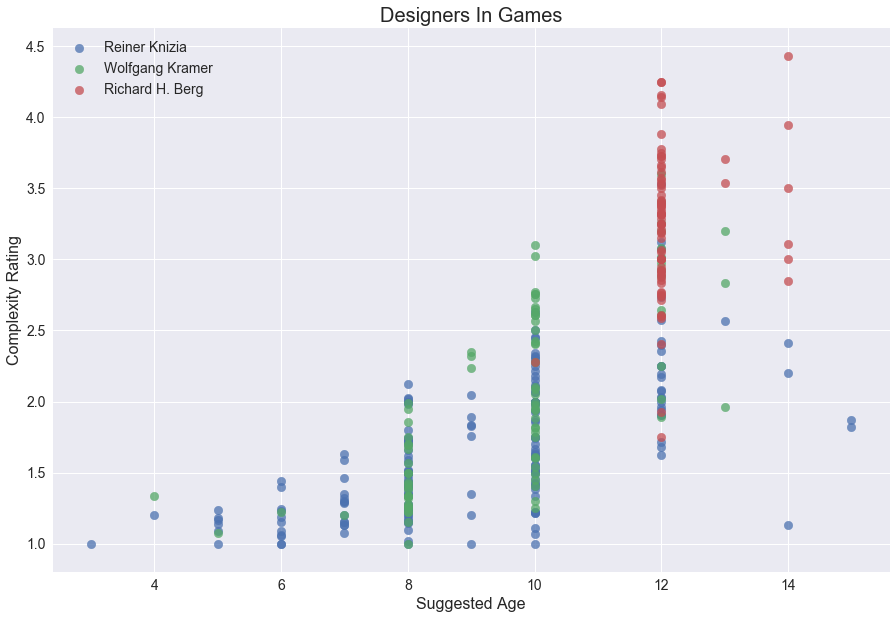

In [2]:
data_analysis.scatter_plot_complxr_vs_sugg_age('designers', ['Reiner Knizia', 'Wolfgang Kramer','Richard H. Berg'])

Overall, there does in fact seem to be a trend where the complexity rating of a boardgame increases with suggested player age. Reiner Knizia, the German who has created 191 boardgames, seems to have designed games across the spectra, from simple children's games to more complex ones for an older audience. Wolfgang seems to mostly make games within the 8-10+ age group, where they're of normal difficulty. Richard, on the other hand, seems to make some very complex games that only teenagers and adults may have the attention span/capacity to learn and play. After quickly checking out Richard's biography on boardgamegeek.com, the data makes sense: he is a reknowned Wargame designer. Finding ways to accurately depict war and wartime strategy throughout the ages can create very complicated and nuanced rules for a game. You'd have to really love the stuff to want to play it. 

### Conclusion

For some boardgame designers, we can clearly see a trend in the kind of games they create, with respect to its complexity and age demographic. This is only feasible to predict when the designer has made many games, such conclusions can't be drawn when they've made only one or two. It may be possible to further filter the results above by singling out certain boardgame categories or mechanincs as well, to see what style of games a designer typically creates. 